In [1]:
import pandas as pd
import numpy as np

In [22]:
import sklearn.metrics as metrics

In [3]:
names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
ds=pd.read_csv("Iris.csv",names=names)
display(ds)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
X=ds.iloc[:,:-1]
label={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2} 
y=[label[c] for c in ds.iloc[:,-1]]

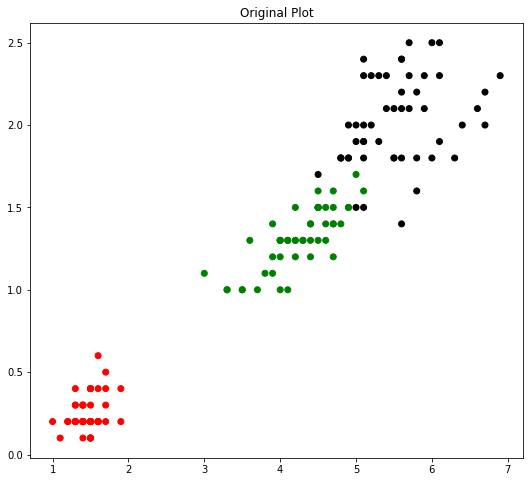

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,8))
colormap=np.array(['red','green','black'])

plt.subplot(1,3,1)
plt.title("Original Plot")
plt.scatter(X.PetalLength,X.PetalWidth,c=colormap[y])

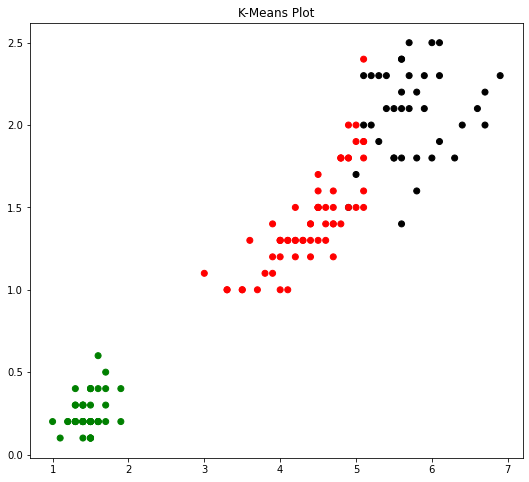

In [21]:
# K MEANS
from sklearn.cluster import KMeans
K_means_model=KMeans(n_clusters=3,random_state=0).fit(X)

plt.figure(figsize=(30,8))
plt.subplot(1,3,2)
plt.title("K-Means Plot")
plt.scatter(X.PetalLength,X.PetalWidth,c=colormap[K_means_model.labels_])

In [26]:
print("Accuracy of the K-Means model: ",metrics.accuracy_score(y,K_means_model.labels_))
print("\nConfusion Matrix of the K-Means model:\n",metrics.confusion_matrix(y,K_means_model.labels_))

Accuracy of the K-Means model:  0.24

Confusion Matrix of the K-Means model:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


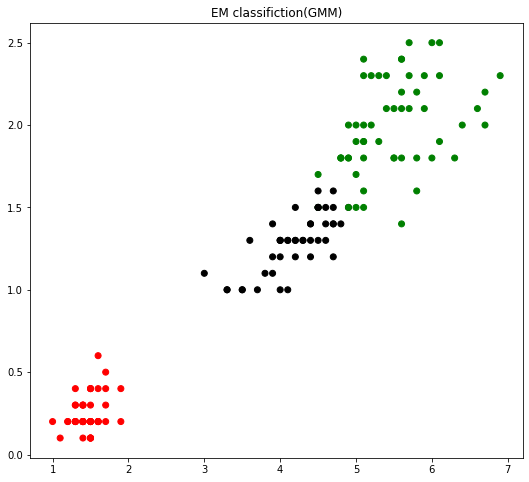

In [27]:
#EM plot

from sklearn.mixture import GaussianMixture

GMM_model=GaussianMixture(n_components=3,random_state=0).fit(X)
y_cluster=GMM_model.predict(X)

plt.figure(figsize=(30,8))
plt.subplot(1,3,2)
plt.title("EM classifiction(GMM)")
plt.scatter(X.PetalLength,X.PetalWidth,c=colormap[y_cluster])

In [28]:
print("Accuracy of the EM model: ",metrics.accuracy_score(y,y_cluster))
print("\nConfusion Matrix of the EM model:\n",metrics.confusion_matrix(y,y_cluster))

Accuracy of the EM model:  0.36666666666666664

Confusion Matrix of the EM model:
 [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]
